In [2]:
# Examples are given for numpy. This code also setups ipython/jupyter
# so that numpy arrays in the output are displayed as images
import numpy
from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [4]:
ims = numpy.load('resources/test_images.npy')
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


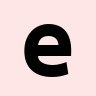

In [5]:
ims[0]

In [8]:
from einops import rearrange, reduce, repeat

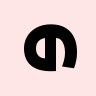

In [16]:
rearrange(ims[0], 'h w c -> w h c')

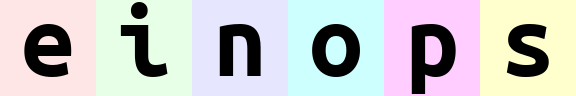

In [19]:
rearrange(ims, 'b h w c ->  h (b w) c')

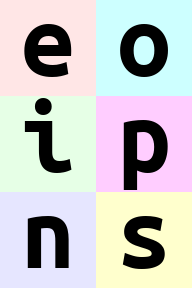

In [29]:
rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)

In [37]:
rearrange(ims, 'b h w c ->  h (b w) c').shape

(96, 576, 3)

In [33]:
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2).shape

(192, 288, 3)

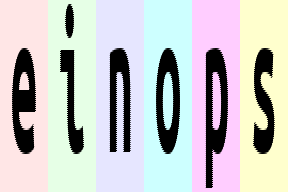

In [34]:
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2)

order matters!

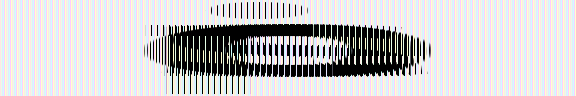

In [48]:
rearrange(ims, 'b h w c -> h (w b) c')

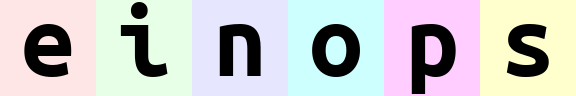

In [45]:
rearrange(ims, 'b h w c -> h (b w) c ')

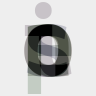

In [62]:
reduce(ims, 'b h w c -> h w c', 'mean')

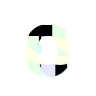

In [65]:
reduce(ims, 'b h w c -> h w c', 'max')

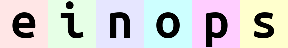

In [66]:
# max pooling
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=2, w2=2)

In [91]:
ims[0].shape

(96, 96, 3)

In [94]:
rearrange(ims[0],'(h h2) (w w2) c -> (h w) h2  w2 c', h2=32, w2=32).shape

(9, 32, 32, 3)

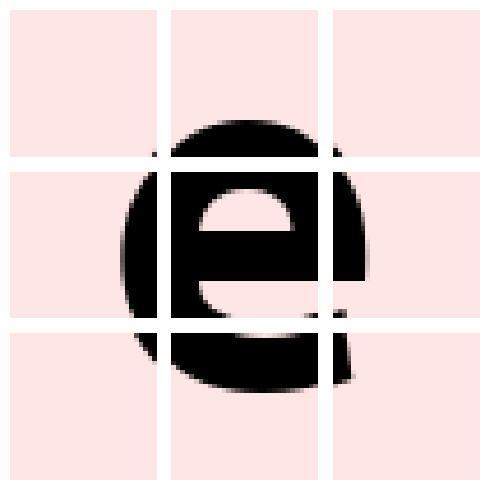

In [98]:
import matplotlib.pyplot as plt\

imgs = rearrange(ims[0],'(h h2) (w w2) c -> (h w) h2  w2 c', h2=32, w2=32)

fig = plt.figure(figsize=(5,5))
for i in range(3):
    for j in range(3):
        ax = plt.subplot(3, 3, i*3 + j + 1)

        ax.imshow(imgs[i*3 + j])
        ax.axis('off')

plt.tight_layout()
plt.show()

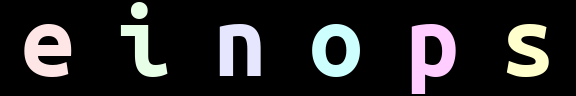

In [107]:
x = reduce(ims, 'b h w c -> b () () c', 'max') - ims
rearrange(x, 'b h w c -> h (b w) c')

In [ ]:
from einops import asnumpy

einsum